In [4]:
import math
from matplotlib import pyplot as plt
import numpy as np
import random

In [5]:
def f(x:float) -> float:
    return ((-1.52 * (x**3)) + (212*(x**2)) + (162*x)) - 2000000

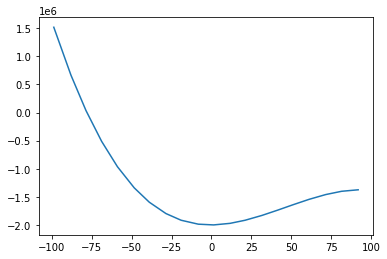

In [6]:
x_vals = np.array([(i+random.random()) for i in range(-99,99,10)])
y_vals = np.array([f(x) for x in x_vals])

plt.plot(x_vals,y_vals)
plt.show()


In [7]:
class Solution:

    def __init__(self, std_dev:float, parent=None) -> None:

        self.std = std_dev
        
        if parent:
            self.gene = float(parent.gene)
            self.mutate()
            self.fit =  abs(f(self.gene))

        else:
            self.gene = float(np.random.normal(0,self.std))
            self.fit =  abs(f(self.gene))
        

    def mutate(self):
        r = float(np.random.normal(0,self.std))
        self.gene = self.gene + r
        

In [8]:
def EA(mu, sigma, std_dev, max_gen):

    parents = [Solution(std_dev=std_dev) for _ in range(mu)]
    children = []
    pool = parents
    pool.sort(key=lambda x: x.fit)


    for _ in range(max_gen):

        std_dev *= 0.85

        for c in range(sigma):

            child = Solution(parent=parents[c], std_dev=std_dev)
            children.append(child)
        
        pool = parents + children
        pool.sort(key=lambda x: x.fit)

        parents = list(pool[:mu])
        children = []
        # print(f"x: {parents[0].gene:<30.26f}     y: {parents[0].fit:<30.26f}      std_dev: {std_dev:<30.26f}")

    print(f"x: {parents[0].gene:<30.26f}     y: {parents[0].fit:<30.26f}      std_dev: {std_dev:<30.26f}")

EA(100,50,1000,200)
        


x: -78.02487276447922681654745247     y: 0.00000000442378222942352295        std_dev: 0.00000000000765217939388973  


In [23]:
def EA_adaptive(mu, sigma, std_dev, max_gen):

    parents = [Solution(std_dev=std_dev) for _ in range(mu)]
    children = []
    pool = parents
    pool.sort(key=lambda x: x.fit)
    cur_std_dev = std_dev

    opt_ratio = 0.2
    alpha = 1.1
    


    for _ in range(max_gen):
        
        improvs = 0

        for c in range(sigma):

            child = Solution(parent=parents[c], std_dev=cur_std_dev)

            if child.fit > parents[c].fit:
                improvs +=1
        
            children.append(child)
        
        cur_ratio = round(improvs / sigma, 2)

        if cur_ratio < opt_ratio:
            cur_std_dev *= alpha
        elif cur_ratio > opt_ratio:
            cur_std_dev /= alpha
        
        pool = parents + children
        pool.sort(key=lambda x: x.fit)

        parents = list(pool[:mu])
        children = []
        
    print(f"x: {parents[0].gene:<30.26f}     y: {parents[0].fit:<30.26f}      std_dev: {cur_std_dev:<30.26f}")





In [24]:
EA(100,20,1000,200)
EA_adaptive(100,20,10,200)

x: -78.02487276447905628629087005     y: 0.00000001490116119384765625        std_dev: 0.00000000000765217939388973  
x: -78.02487276474411714843881782     y: 0.00001606950536370277404785        std_dev: 0.00000005265783124294511295  
